In [1]:
import pyodbc
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

from warnings import\
    filterwarnings as FilterOutWarnings
FilterOutWarnings("ignore")

from math import sqrt

from scipy.stats import\
    ttest_ind as T_test,\
    f_oneway as F_test
from sklearn.metrics import\
    mean_squared_error as MSE,\
    mean_absolute_error as MAE,\
    r2_score as R2


In [2]:
def getDataFrameFromSqlServer(sql_select):
    if (len(sql_select) == 0 or sql_select == ""):
        return pd.DataFrame([])
    
    connStr = "DRIVER={ODBC Driver 17 for SQL Server};SERVER=INBOOK_X1\MSSQLSERVER2;DATABASE=PrayerTimesDW;UID=sa;PWD=abcdE!2345;"
    conn = pyodbc.connect(connStr)
    try:
        return pd.read_sql(sql=sql_select, con=conn)
    except Exception as ex:
        print(ex)
        return pd.DataFrame([])

In [3]:
sql_1 = """
    SELECT time_date, time_fajr, time_zuhr, time_asr, time_maghrib, time_isha 
    FROM t_time_prayer_source_1 WITH(NOLOCK)
    WHERE time_date >= '2024-01-01' AND time_date <= '2024-01-31'
    ORDER BY time_date ASC;
"""
df_source_1 = getDataFrameFromSqlServer(sql_1)

In [4]:
df_source_1 = df_source_1\
    .rename(columns={"time_fajr":"fajr_1", "time_zuhr":"zuhr_1",\
                     "time_asr":"asr_1", "time_maghrib":"maghrib_1",\
                        "time_isha":"isha_1"})
# df_source_1

In [5]:
sql_2 = """
    SELECT time_date, time_fajr, time_zuhr, time_asr, time_maghrib, time_isha 
    FROM t_time_prayer_source_2 WITH(NOLOCK)
    WHERE time_date >= '2024-01-01' AND time_date <= '2024-01-31'
    ORDER BY time_date ASC;
"""
df_source_2 = getDataFrameFromSqlServer(sql_2)

In [6]:
df_source_2 = df_source_2\
    .rename(columns={"time_fajr":"fajr_2", "time_zuhr":"zuhr_2",\
                     "time_asr":"asr_2", "time_maghrib":"maghrib_2",\
                        "time_isha":"isha_2"})
# df_source_2

In [7]:
# sql_3 = """
#     SELECT time_date, time_fajr, time_zuhr, time_asr, time_maghrib, time_isha 
#     FROM t_time_prayer_source_3 WITH(NOLOCK)
#     WHERE time_date >= '2024-01-01' AND time_date <= '2024-01-31'
#     ORDER BY time_date ASC;
# """
# df_source_3 = getDataFrameFromSqlServer(sql_3)

In [8]:
# df_source_3 = df_source_3\
#     .rename(columns={"time_fajr":"fajr_3", "time_zuhr":"zuhr_3",\
#                      "time_asr":"asr_3", "time_maghrib":"maghrib_3",\
#                         "time_isha":"isha_3"})
# df_source_3

In [9]:
combined_df = pd.merge(df_source_1,df_source_2,left_on=["time_date"],right_on=["time_date"])
# combined_df = pd.merge(combined_df,df_source_3,left_on=["time_date"],right_on=["time_date"])

combined_df

,time_date,fajr_1,zuhr_1,asr_1,maghrib_1,isha_1,fajr_2,zuhr_2,asr_2,maghrib_2,isha_2
0,2024-01-01,06:06:00,13:19:00,16:42:00,19:16:00,20:31:00,06:03:00,13:16:00,16:40:00,19:15:00,20:29:00
1,2024-01-02,06:07:00,13:20:00,16:42:00,19:17:00,20:31:00,06:04:00,13:17:00,16:41:00,19:15:00,20:30:00
2,2024-01-03,06:07:00,13:20:00,16:43:00,19:17:00,20:32:00,06:04:00,13:17:00,16:41:00,19:16:00,20:30:00
3,2024-01-04,06:08:00,13:21:00,16:43:00,19:18:00,20:32:00,06:05:00,13:18:00,16:42:00,19:16:00,20:31:00
4,2024-01-05,06:08:00,13:21:00,16:44:00,19:18:00,20:33:00,06:05:00,13:18:00,16:42:00,19:17:00,20:31:00
5,2024-01-06,06:09:00,13:22:00,16:44:00,19:19:00,20:33:00,06:06:00,13:19:00,16:43:00,19:17:00,20:32:00
6,2024-01-07,06:09:00,13:22:00,16:44:00,19:19:00,20:34:00,06:06:00,13:19:00,16:43:00,19:18:00,20:32:00
7,2024-01-08,06:10:00,13:22:00,16:45:00,19:20:00,20:34:00,06:07:00,13:20:00,16:44:00,19:18:00,20:32:00
8,2024-01-09,06:10:00,13:23:00,16:45:00,19:20:00,20:34:00,06:07:00,13:20:00,16:44:00,19:19:00,20:33:00
9,2024-01-10,06:10:00,13:23:00,16:46:00,19:21:00,20:35:00,06:08:00,13:21:00,16:44:00,19:19:00,20:33:00


In [10]:
def getColumnMinuteDiff(ref_col = [], calc_col = []):
    col = []

    if (len(ref_col) == len(calc_col)):
        for i in range(len(ref_col)):
            col.append(calc_col[i].minute - ref_col[i].minute)
    
    return col

def getColumnTimeInTotalMins(col_df = []):
    col = []

    if (len(col_df) > 0):
        for i in range(len(col_df)):
            t = col_df[i]
            col.append(t.hour * 60 + t.minute)
        
    return col

In [11]:
diff_df = pd.DataFrame([])
diff_df["time_date"] = combined_df["time_date"]
diff_df["fajr_1_2"] = getColumnMinuteDiff(combined_df["fajr_1"], combined_df["fajr_2"])
diff_df["zuhr_1_2"] = getColumnMinuteDiff(combined_df["zuhr_1"], combined_df["zuhr_2"])
diff_df["asr_1_2"] = getColumnMinuteDiff(combined_df["asr_1"], combined_df["asr_2"])
diff_df["maghrib_1_2"] = getColumnMinuteDiff(combined_df["maghrib_1"], combined_df["maghrib_2"])
diff_df["isha_1_2"] = getColumnMinuteDiff(combined_df["isha_1"], combined_df["isha_2"])

In [12]:
diff_df

,time_date,fajr_1_2,zuhr_1_2,asr_1_2,maghrib_1_2,isha_1_2
0,2024-01-01,-3,-3,-2,-1,-2
1,2024-01-02,-3,-3,-1,-2,-1
2,2024-01-03,-3,-3,-2,-1,-2
3,2024-01-04,-3,-3,-1,-2,-1
4,2024-01-05,-3,-3,-2,-1,-2
5,2024-01-06,-3,-3,-1,-2,-1
6,2024-01-07,-3,-3,-1,-1,-2
7,2024-01-08,-3,-2,-1,-2,-2
8,2024-01-09,-3,-3,-1,-1,-1
9,2024-01-10,-2,-2,-2,-2,-2


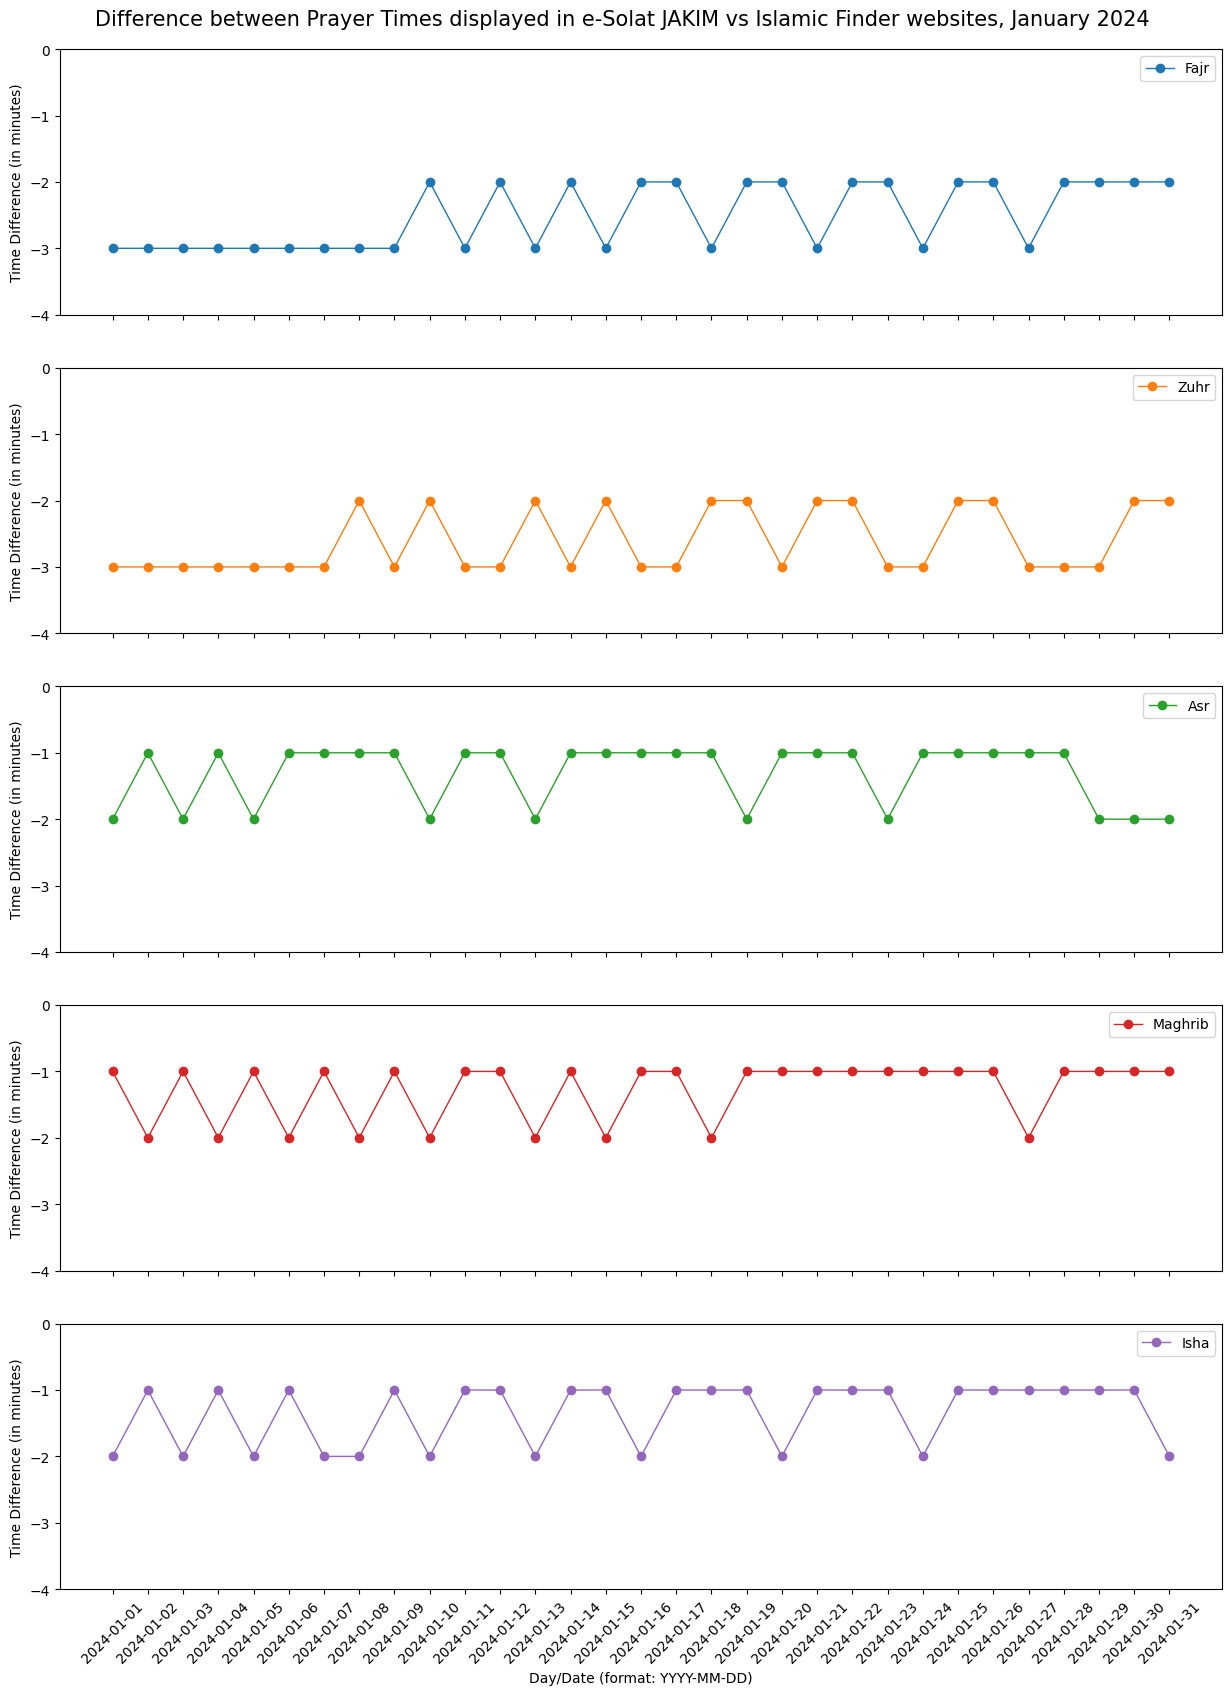

In [13]:
f1, ax1 = plt.subplots(nrows=5, ncols=1, sharex=True, figsize=(15,20))
plt.suptitle("Difference between Prayer Times displayed in e-Solat JAKIM vs Islamic Finder websites, January 2024", fontsize=15, y=0.9)
xticks = pd.date_range(diff_df["time_date"][0], diff_df["time_date"][30]).to_pydatetime()
yticks = np.arange(-4,1,1)

diff_df.plot(label="Fajr", x="time_date", y="fajr_1_2", kind="line", linewidth=1, marker='o', ax=ax1[0], color="C0", yticks=yticks)
diff_df.plot(label="Zuhr", x="time_date", y="zuhr_1_2", kind="line", linewidth=1, marker='o', ax=ax1[1], color="C1", yticks=yticks)
diff_df.plot(label="Asr", x="time_date", y="asr_1_2", kind="line", linewidth=1, marker='o', ax=ax1[2],  color="C2", yticks=yticks)
diff_df.plot(label="Maghrib", x="time_date", y="maghrib_1_2", kind="line", linewidth=1, marker='o', ax=ax1[3], color="C3", yticks=yticks)
diff_df.plot(label="Isha", x="time_date", y="isha_1_2", kind="line", linewidth=1, marker='o', ax=ax1[4], color="C4", xticks=xticks, yticks=yticks)

for j in range(5):
    ax1[j].set_ylabel("Time Difference (in minutes)")
    ax1[j].set_ylim(-4,0)

ax1[4].set_xlabel("Day/Date (format: YYYY-MM-DD)")
plt.xticks(rotation=45)
plt.show()

In [14]:
copied_df = combined_df.drop(["time_date"], axis=1)
copied_df["fajr_1"] = getColumnTimeInTotalMins(copied_df["fajr_1"])
copied_df["zuhr_1"] = getColumnTimeInTotalMins(copied_df["zuhr_1"])
copied_df["asr_1"] = getColumnTimeInTotalMins(copied_df["asr_1"])
copied_df["maghrib_1"] = getColumnTimeInTotalMins(copied_df["maghrib_1"])
copied_df["isha_1"] = getColumnTimeInTotalMins(copied_df["isha_1"])
copied_df["fajr_2"] = getColumnTimeInTotalMins(copied_df["fajr_2"])
copied_df["zuhr_2"] = getColumnTimeInTotalMins(copied_df["zuhr_2"])
copied_df["asr_2"] = getColumnTimeInTotalMins(copied_df["asr_2"])
copied_df["maghrib_2"] = getColumnTimeInTotalMins(copied_df["maghrib_2"])
copied_df["isha_2"] = getColumnTimeInTotalMins(copied_df["isha_2"])

In [15]:
copied_df

,fajr_1,zuhr_1,asr_1,maghrib_1,isha_1,fajr_2,zuhr_2,asr_2,maghrib_2,isha_2
0,366,799,1002,1156,1231,363,796,1000,1155,1229
1,367,800,1002,1157,1231,364,797,1001,1155,1230
2,367,800,1003,1157,1232,364,797,1001,1156,1230
3,368,801,1003,1158,1232,365,798,1002,1156,1231
4,368,801,1004,1158,1233,365,798,1002,1157,1231
5,369,802,1004,1159,1233,366,799,1003,1157,1232
6,369,802,1004,1159,1234,366,799,1003,1158,1232
7,370,802,1005,1160,1234,367,800,1004,1158,1232
8,370,803,1005,1160,1234,367,800,1004,1159,1233
9,370,803,1006,1161,1235,368,801,1004,1159,1233


In [16]:
def showStatisticsEvaluation(df1 = [], df2 = []):
    if (len(df1) == 0 or len(df2) == 0):
        return print("Invalid data inputs!")
    
    eval_r2 = R2(df1,df2)
    eval_mae = MAE(df1,df2)
    eval_rmse = sqrt(MSE(df1,df2))
    eval_t = T_test(df1,df2)[1]
    eval_F = F_test(df1,df2)[1]

    print("--==================================--")
    print("Statistics Evaluation for Accuracy")
    print(f"R\u00b2 = {eval_r2:.6f}")
    print(f"MAE = {eval_mae:.6f}")
    print(f"RMSE = {eval_rmse:.6f}")
    print(f"t-Test (p-value) = {eval_t:.6f}")
    print(f"F-test (p-value) = {eval_F:.6f}")
    print("--==================================--")

In [17]:
print("Comparing Fajr Prayer Time - e-Solat JAKIM vs Islamic Finder")
showStatisticsEvaluation(copied_df["fajr_1"],copied_df["fajr_2"])

Comparing Fajr Prayer Time - e-Solat JAKIM vs Islamic Finder
--==================================--
Statistics Evaluation for Accuracy
R² = 0.426447
MAE = 2.516129
RMSE = 2.565277
t-Test (p-value) = 0.007794
F-test (p-value) = 0.007794
--==================================--


In [19]:
print("Comparing Zuhr Prayer Time - e-Solat JAKIM vs Islamic Finder")
showStatisticsEvaluation(copied_df["zuhr_1"],copied_df["zuhr_2"])

Comparing Zuhr Prayer Time - e-Solat JAKIM vs Islamic Finder
--==================================--
Statistics Evaluation for Accuracy
R² = 0.239242
MAE = 2.612903
RMSE = 2.657916
t-Test (p-value) = 0.002025
F-test (p-value) = 0.002025
--==================================--


In [20]:
print("Comparing Asr Prayer Time - e-Solat JAKIM vs Islamic Finder")
showStatisticsEvaluation(copied_df["asr_1"],copied_df["asr_2"])

Comparing Asr Prayer Time - e-Solat JAKIM vs Islamic Finder
--==================================--
Statistics Evaluation for Accuracy
R² = 0.745217
MAE = 1.322581
RMSE = 1.402762
t-Test (p-value) = 0.071181
F-test (p-value) = 0.071181
--==================================--


In [21]:
print("Comparing Maghrib Prayer Time - e-Solat JAKIM vs Islamic Finder")
showStatisticsEvaluation(copied_df["maghrib_1"],copied_df["maghrib_2"])

Comparing Maghrib Prayer Time - e-Solat JAKIM vs Islamic Finder
--==================================--
Statistics Evaluation for Accuracy
R² = 0.835016
MAE = 1.290323
RMSE = 1.367833
t-Test (p-value) = 0.151577
F-test (p-value) = 0.151577
--==================================--


In [22]:
print("Comparing Isha Prayer Time - e-Solat JAKIM vs Islamic Finder")
showStatisticsEvaluation(copied_df["isha_1"],copied_df["isha_2"])

Comparing Isha Prayer Time - e-Solat JAKIM vs Islamic Finder
--==================================--
Statistics Evaluation for Accuracy
R² = 0.700212
MAE = 1.354839
RMSE = 1.436842
t-Test (p-value) = 0.056373
F-test (p-value) = 0.056373
--==================================--
